Exploratory Data Analysis - Appliances Energy Prediction Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [6]:
column_names = {'lights':'Lights', 
'T1': 'T_Kitchen_Area',
'RH_1': 'RH_Kitchen_area', 
'T2': 'T_Living_Room', 
'RH_2': 'RH_Living_Room',
'T3': 'T_Laundry_Room', 
'RH_3': 'RH_Laundry_Room',
'T4': 'T_Office_Room',
'RH_4': 'RH_Office_Room',
'T5': 'T_Bathroom',
'RH_5': 'RH_Bathroom', 
'T6': 'T_Outside_North', 
'RH_6': 'RH_Outside_North',
'T7': 'T_Ironing_Room', 
'RH_7': 'RH_Ironing_Room',
'T8': 'T_Teenager_Room',
'RH_8': 'RH_Teenager_Room',
'T9': 'T_Parents_Room',
'RH_9': 'RH_Parents_Room'}

In [7]:
df = df.rename(columns=column_names)

In [9]:
df.info()
#shape - 19735, 29
#int64 - Appliances, lights
#object - data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              19735 non-null  object 
 1   Appliances        19735 non-null  int64  
 2   Lights            19735 non-null  int64  
 3   T_Kitchen_Area    19735 non-null  float64
 4   RH_Kitchen_area   19735 non-null  float64
 5   T_Living_Room     19735 non-null  float64
 6   RH_Living_Room    19735 non-null  float64
 7   T_Laundry_Room    19735 non-null  float64
 8   RH_Laundry_Room   19735 non-null  float64
 9   T_Office_Room     19735 non-null  float64
 10  RH_Office_Room    19735 non-null  float64
 11  T_Bathroom        19735 non-null  float64
 12  RH_Bathroom       19735 non-null  float64
 13  T_Outside_North   19735 non-null  float64
 14  RH_Outside_North  19735 non-null  float64
 15  T_Ironing_Room    19735 non-null  float64
 16  RH_Ironing_Room   19735 non-null  float6

In [8]:
df.describe()

,Appliances,Lights,T_Kitchen_Area,RH_Kitchen_area,T_Living_Room,RH_Living_Room,T_Laundry_Room,RH_Laundry_Room,T_Office_Room,RH_Office_Room,...,T_Parents_Room,RH_Parents_Room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<AxesSubplot:title={'center':'Unique values per feature'}>

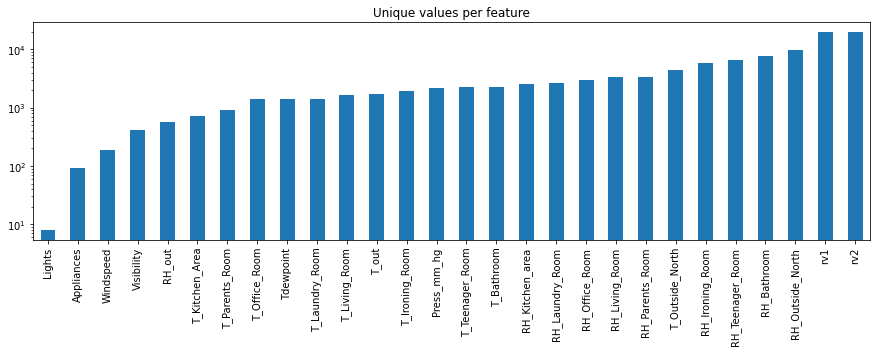

In [10]:
#For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

#plot information with y-axis in log scale
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature")

In [11]:
df['Appliances'].unique(), df['Appliances'].nunique()

(array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
         120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
          20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
         350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
         620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
         480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
         630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
         670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
         900,  820,  870,  840], dtype=int64),
 92)

In [12]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=["Appliances"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


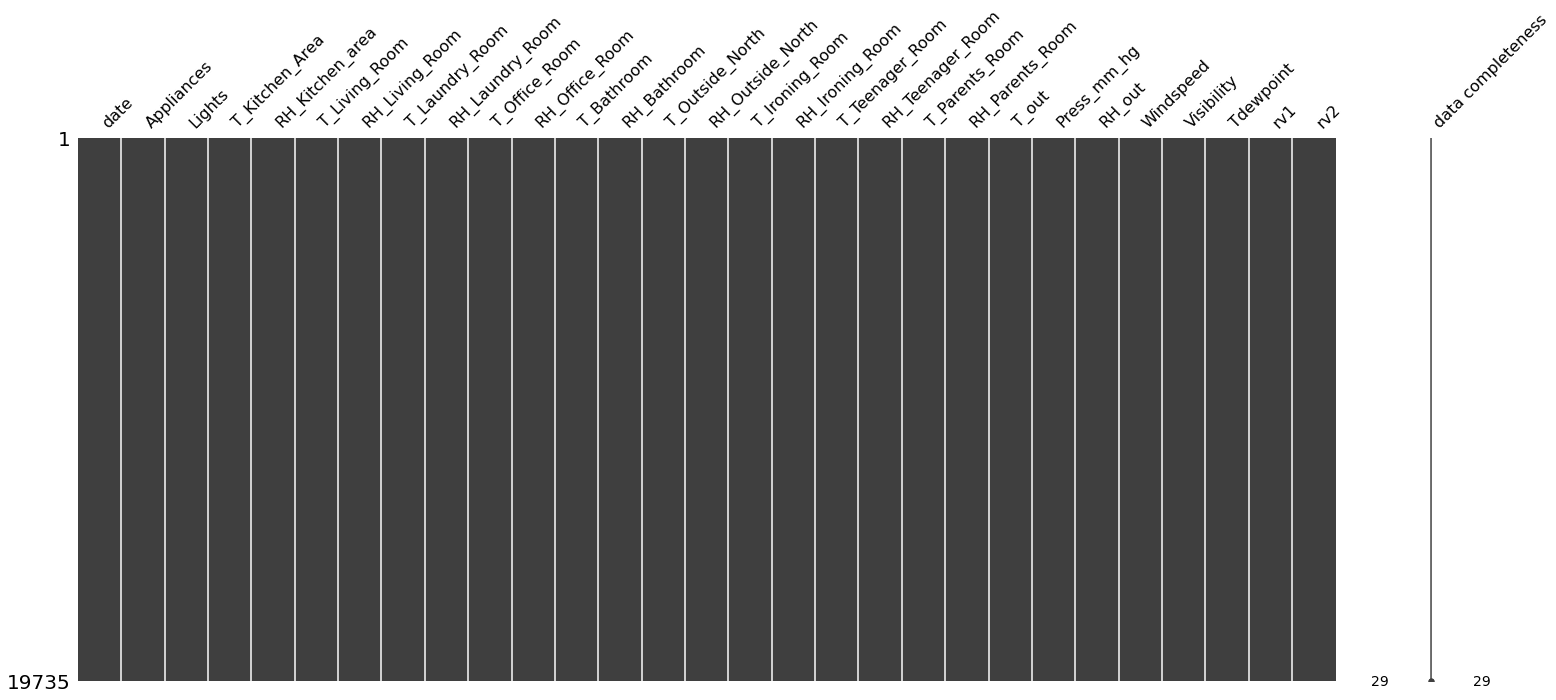

In [16]:
#Check missing values

import missingno as msno

msno.matrix(df, labels=True, sort="descending");

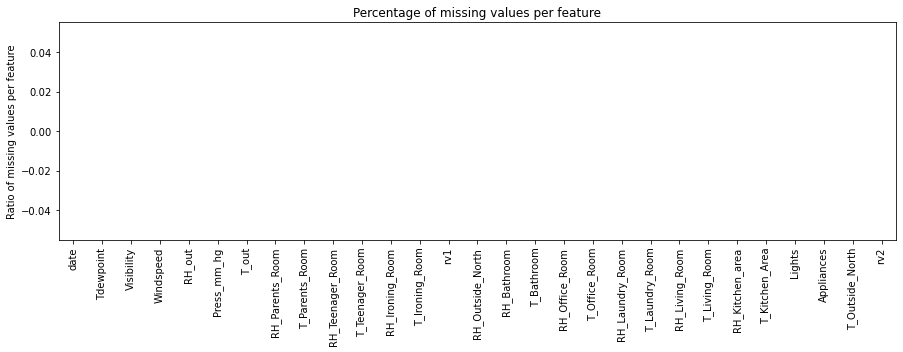

In [17]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

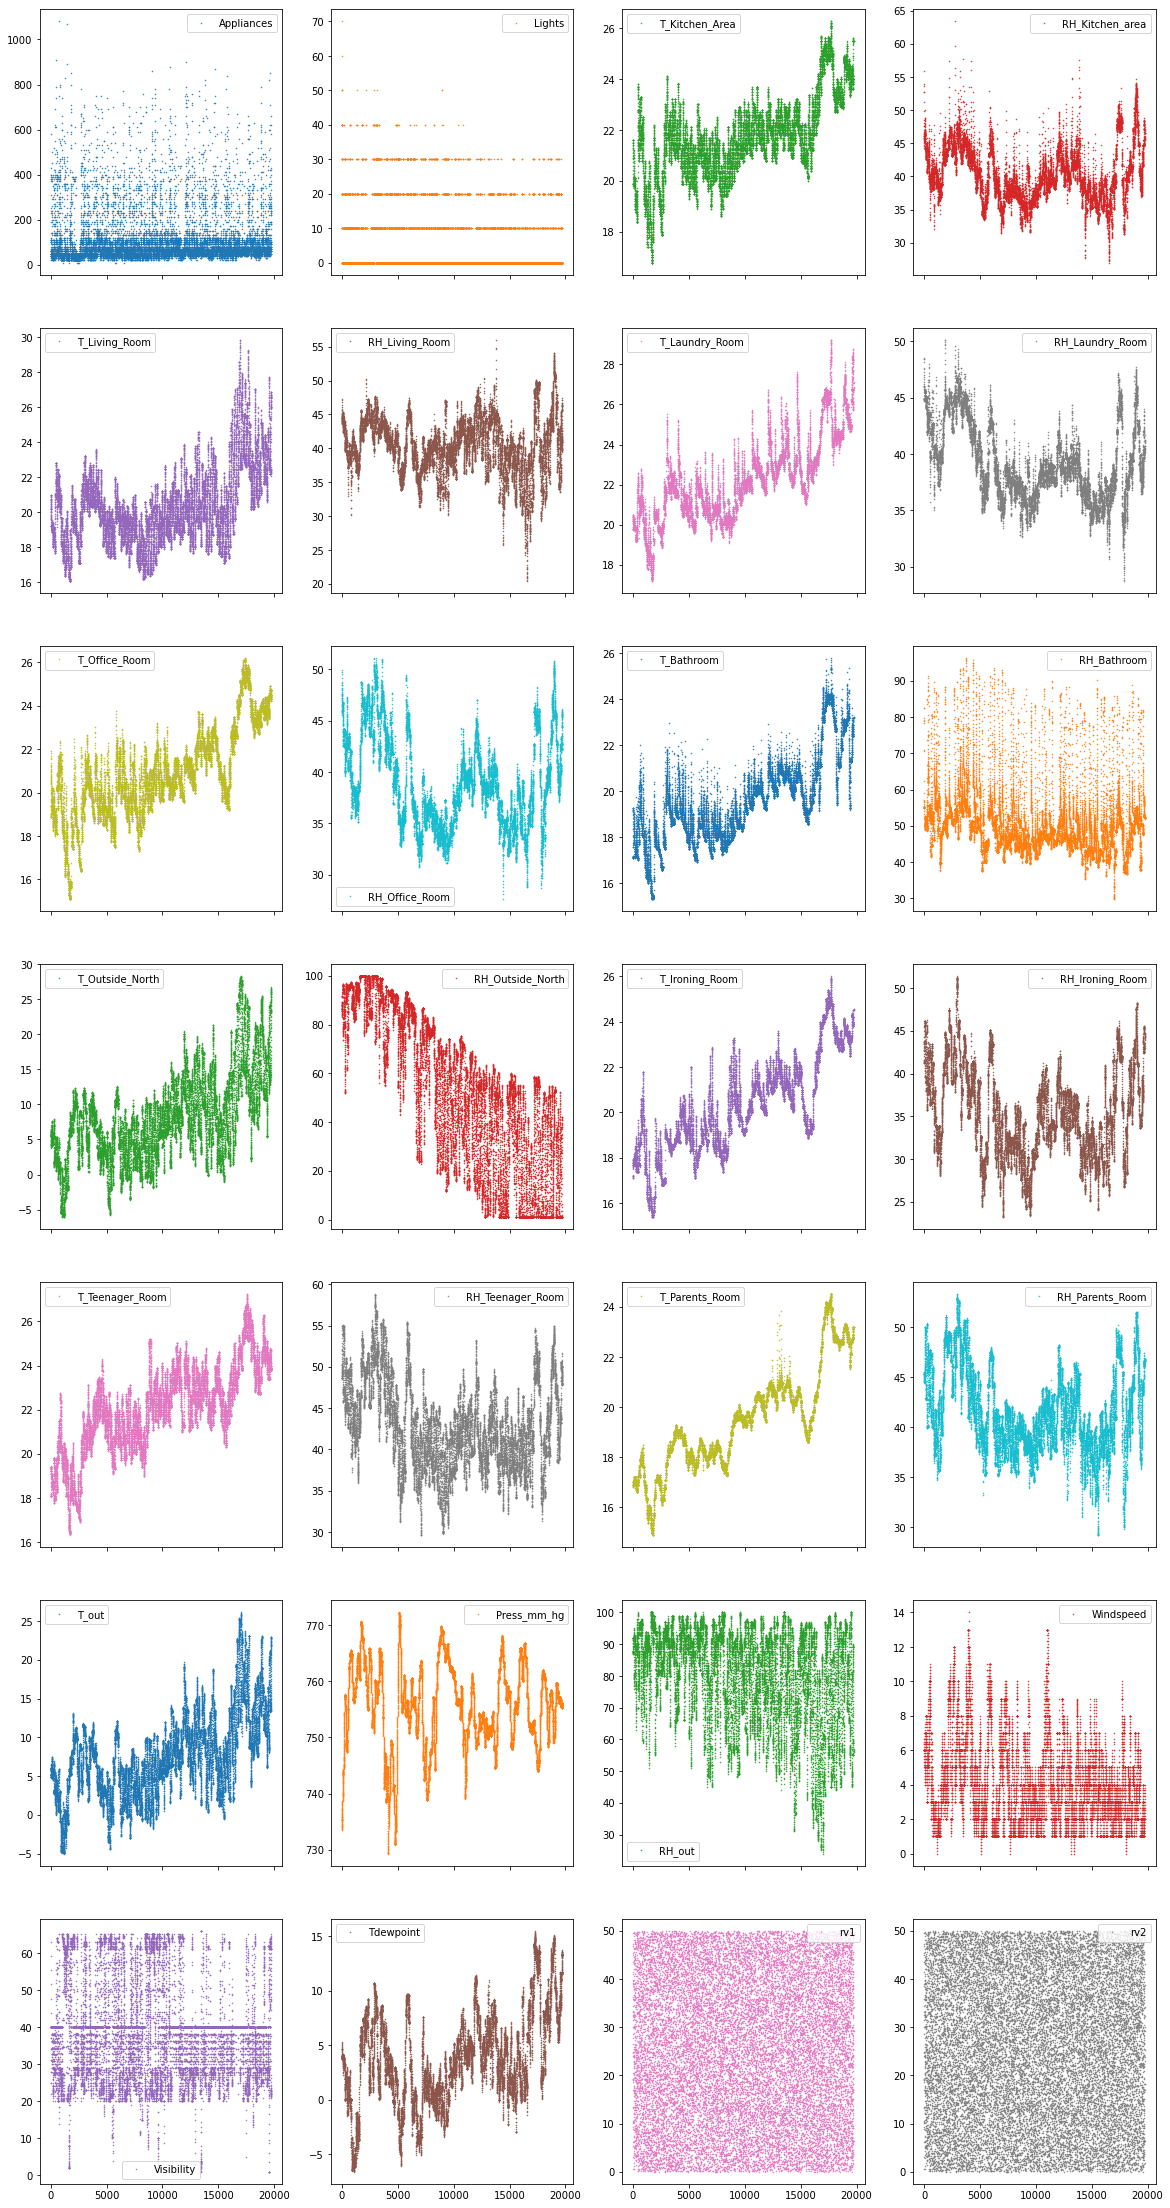

In [18]:
df.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(20, 40),
          markersize=1);

# y-axis = feature values
# x-axis = sample index

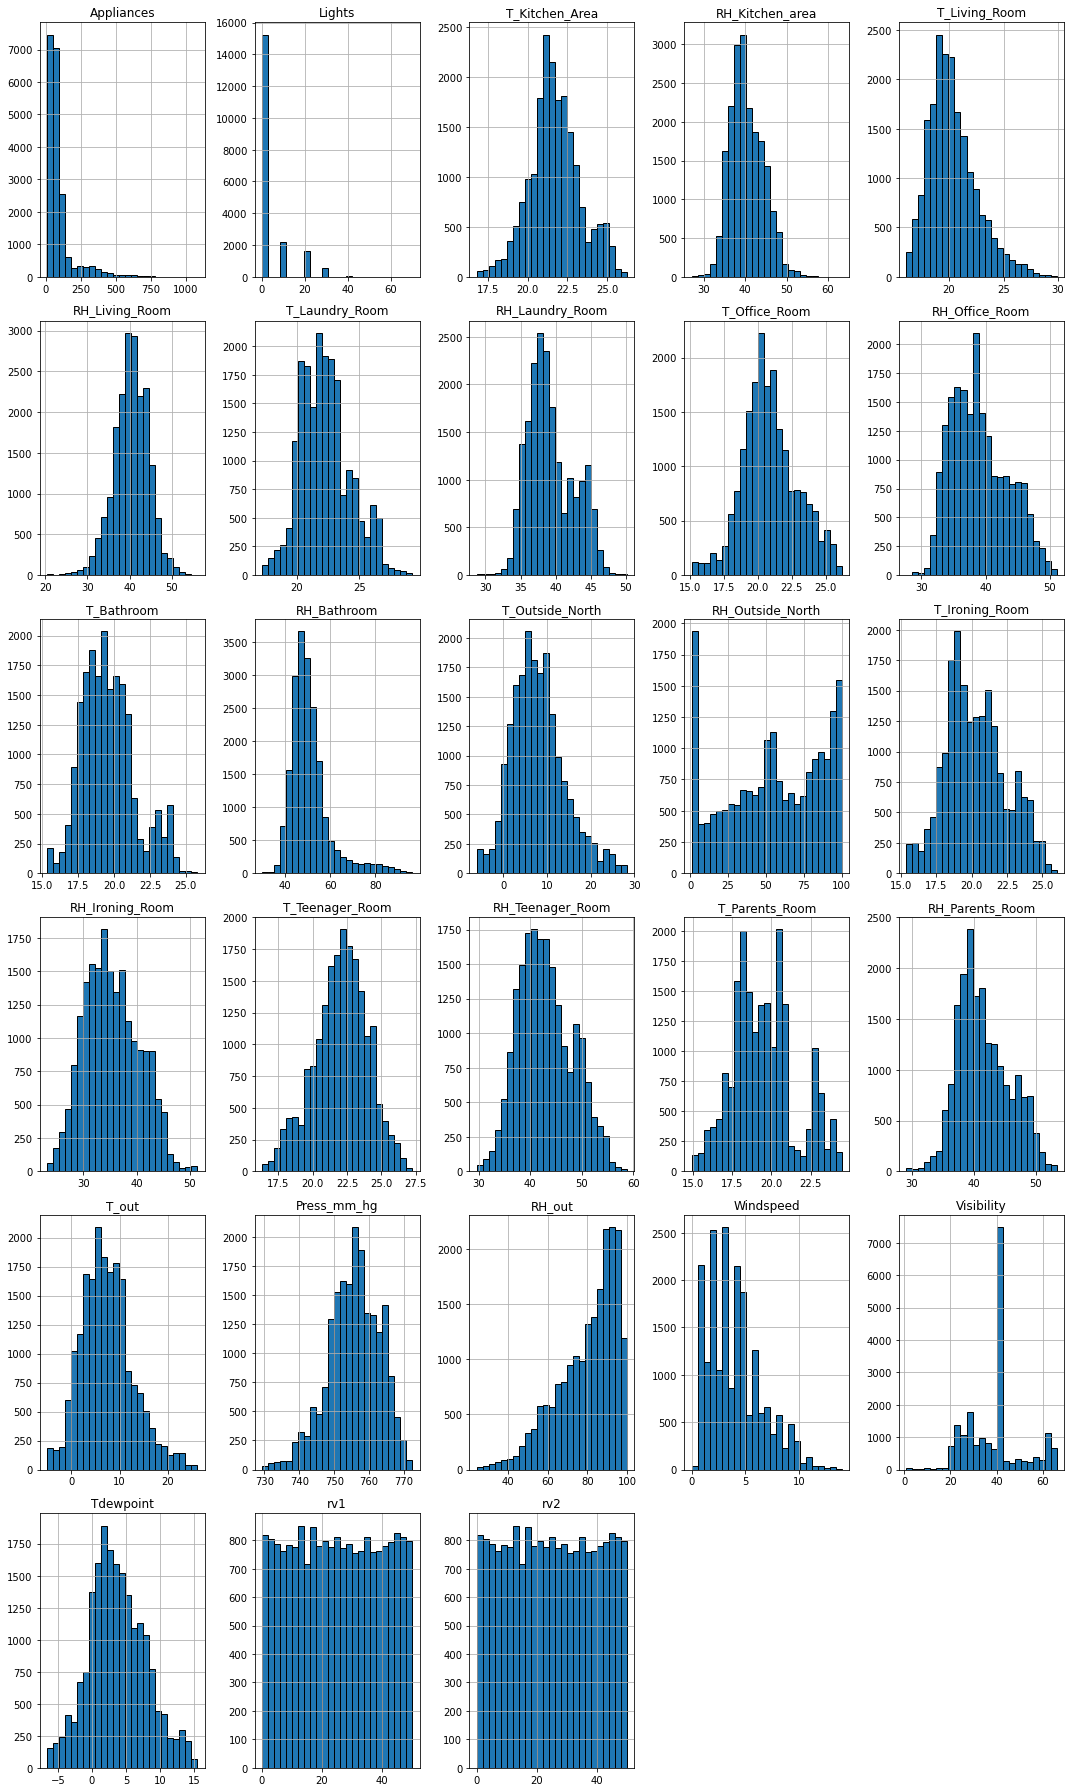

In [25]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

date              1.000000
rv1               0.000101
rv2               0.000101
T_Living_Room     0.000051
T_Kitchen_Area    0.000000
dtype: float64

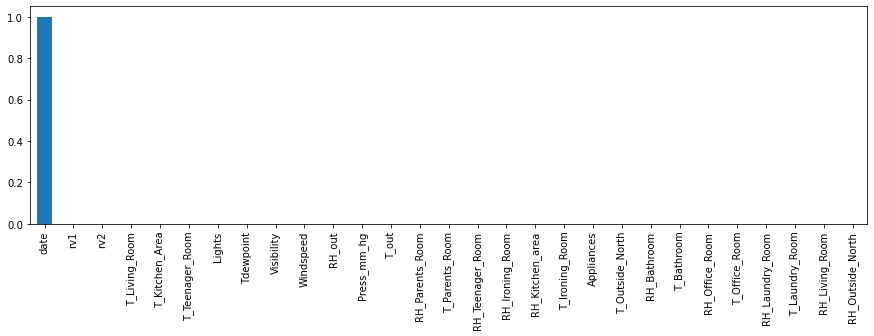

In [26]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));  

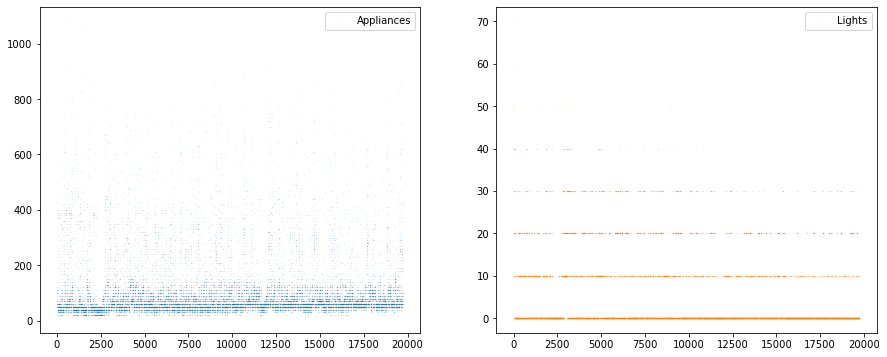

In [33]:
df[["Appliances", "Lights"]].plot(lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6));

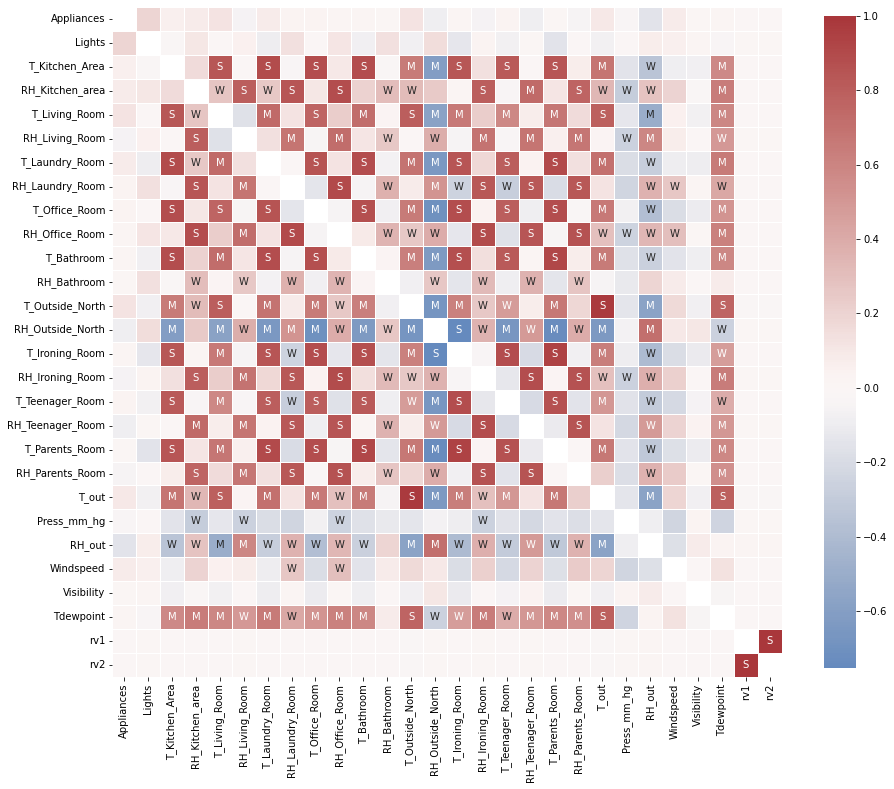

In [30]:
# Computes feature correlation
df_corr = df.corr( method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

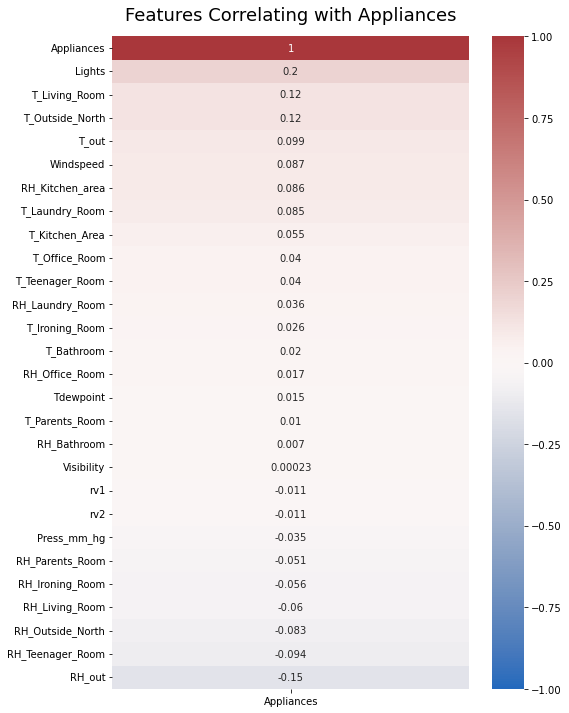

In [35]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Appliances']].sort_values(by='Appliances', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Features Correlating with Appliances', fontdict={'fontsize':18}, pad=16);

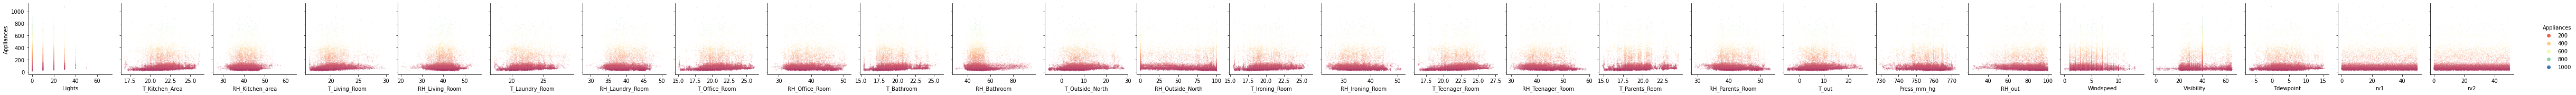

In [52]:
sns.pairplot(
    df,
  	plot_kws={"s": 2, "alpha": 0.2},
  	hue="Appliances",
  	palette="Spectral",
    y_vars="Appliances");

In [53]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

In [54]:
# Create a new dataframe which doesn't contain continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(19735, 1)